In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
credit_data=pd.read_csv('german_credit_data.csv')

In [3]:
credit_data.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [4]:
credit_data.drop(columns='Unnamed: 0',inplace=True)

In [5]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Age                 1000 non-null int64
Sex                 1000 non-null object
Job                 1000 non-null int64
Housing             1000 non-null object
Saving accounts     817 non-null object
Checking account    606 non-null object
Credit amount       1000 non-null int64
Duration            1000 non-null int64
Purpose             1000 non-null object
Risk                1000 non-null object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


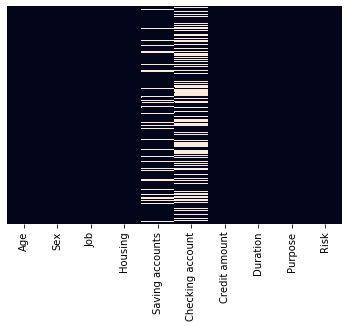

In [6]:
sns.heatmap(credit_data.isnull(),yticklabels=False,cbar=False)

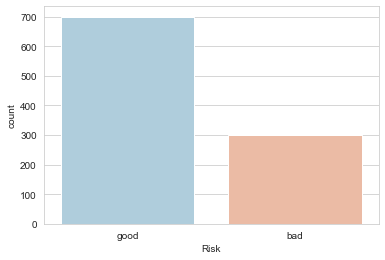

In [7]:
sns.set_style('whitegrid')
sns.countplot(x='Risk',data=credit_data,palette='RdBu_r')

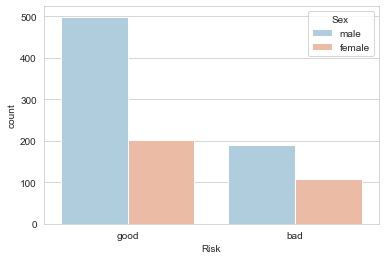

In [8]:
sns.set_style('whitegrid')
sns.countplot(x='Risk',data=credit_data,palette='RdBu_r',hue='Sex')

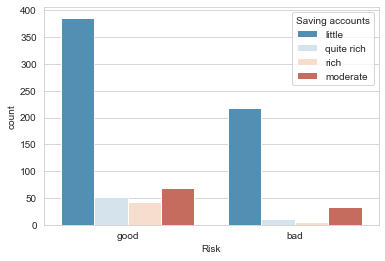

In [9]:
sns.set_style('whitegrid')
sns.countplot(x='Risk',data=credit_data,palette='RdBu_r',hue=credit_data['Saving accounts'])

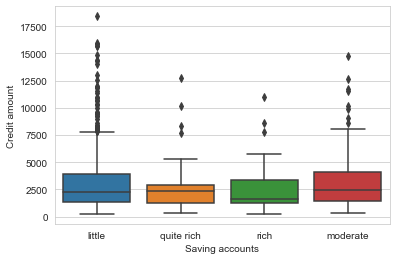

In [10]:
sns.boxplot(data=credit_data,x=credit_data['Saving accounts'],y='Credit amount')

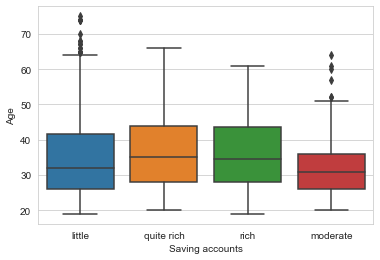

In [11]:
sns.boxplot(data=credit_data,x=credit_data['Saving accounts'],y='Age')

In [12]:
#NaN data is 20%
credit_data['Saving accounts']=credit_data['Saving accounts'].fillna('Not Known')

In [13]:
#NaN daat is almost 50%, no value of this column.
credit_data.drop(['Checking account'],axis=1,inplace=True)

In [14]:
risk=pd.get_dummies(credit_data['Risk'],drop_first=True)
sex=pd.get_dummies(credit_data['Sex'],drop_first=True)
housing=pd.get_dummies(credit_data['Housing'],drop_first=True)
purpose=pd.get_dummies(credit_data['Purpose'],drop_first=True)
saving_account=pd.get_dummies(credit_data['Saving accounts'],drop_first=True)


In [15]:
credit_data.drop(['Risk','Sex','Housing','Purpose','Saving accounts'],axis=1,inplace=True)

In [16]:
credit_data = pd.concat([credit_data,risk,sex,housing,purpose,saving_account],axis=1)

In [17]:
credit_data.head()

,Age,Job,Credit amount,Duration,good,male,own,rent,car,domestic appliances,education,furniture/equipment,radio/TV,repairs,vacation/others,little,moderate,quite rich,rich
0,67,2,1169,6,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0
1,22,2,5951,48,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
2,49,1,2096,12,1,1,1,0,0,0,1,0,0,0,0,1,0,0,0
3,45,2,7882,42,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0
4,53,2,4870,24,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0


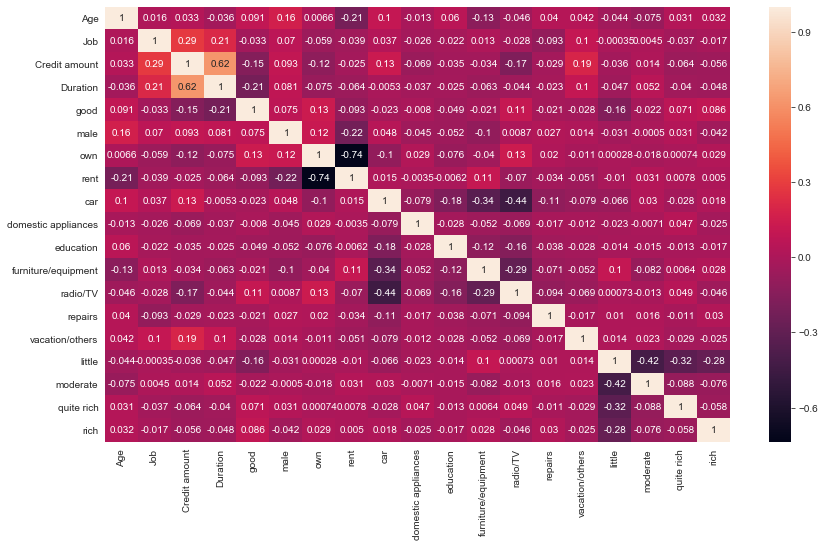

In [18]:
plt.figure(figsize=(14,8))
sns.heatmap(credit_data.corr(),annot=True)

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X=credit_data.drop('good',axis=1)
y=credit_data['good']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
logmodel=LogisticRegression()

In [23]:
logmodel.fit(X_test,y_test)

C:\Users\AnishB\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:
pred_l=logmodel.predict(X_test)

In [25]:
from sklearn.metrics import confusion_matrix,classification_report

In [26]:
print(confusion_matrix(y_test,pred_l))
print(classification_report(y_test,pred_l))

[[ 26  75]
 [ 14 215]]
              precision    recall  f1-score   support

           0       0.65      0.26      0.37       101
           1       0.74      0.94      0.83       229

    accuracy                           0.73       330
   macro avg       0.70      0.60      0.60       330
weighted avg       0.71      0.73      0.69       330



In [27]:
from sklearn.ensemble import RandomForestClassifier

In [28]:
rfc=RandomForestClassifier(n_estimators=2)

In [29]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=2,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [30]:
pred_r=rfc.predict(X_test)

In [31]:
print(confusion_matrix(y_test,pred_r))

[[ 55  46]
 [ 96 133]]


In [32]:
print(classification_report(y_test,pred_r))

              precision    recall  f1-score   support

           0       0.36      0.54      0.44       101
           1       0.74      0.58      0.65       229

    accuracy                           0.57       330
   macro avg       0.55      0.56      0.54       330
weighted avg       0.63      0.57      0.59       330



In [33]:
from sklearn.tree import DecisionTreeClassifier

In [34]:
tree=DecisionTreeClassifier()

In [35]:
tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [36]:
pred_t=tree.predict(X_test)

In [37]:
print(confusion_matrix(y_test,pred_t))
print(classification_report(y_test,pred_t))

[[ 38  63]
 [ 52 177]]
              precision    recall  f1-score   support

           0       0.42      0.38      0.40       101
           1       0.74      0.77      0.75       229

    accuracy                           0.65       330
   macro avg       0.58      0.57      0.58       330
weighted avg       0.64      0.65      0.65       330



In [38]:
from sklearn.neighbors import KNeighborsClassifier

In [39]:
knn=KNeighborsClassifier(n_neighbors=1)

In [40]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [41]:
pred_k=knn.predict(X_test)

In [42]:
print(confusion_matrix(y_test,pred_t))
print(classification_report(y_test,pred_t))

[[ 38  63]
 [ 52 177]]
              precision    recall  f1-score   support

           0       0.42      0.38      0.40       101
           1       0.74      0.77      0.75       229

    accuracy                           0.65       330
   macro avg       0.58      0.57      0.58       330
weighted avg       0.64      0.65      0.65       330



In [43]:
from sklearn.svm import SVC

In [44]:
model = SVC()

In [45]:
model.fit(X_train,y_train)

C:\Users\AnishB\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [46]:
pred_svc = model.predict(X_test)

In [47]:
from sklearn.metrics import classification_report,confusion_matrix

In [48]:
print(confusion_matrix(y_test,pred_svc))
print(classification_report(y_test,pred_svc))

[[  0 101]
 [  0 229]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       101
           1       0.69      1.00      0.82       229

    accuracy                           0.69       330
   macro avg       0.35      0.50      0.41       330
weighted avg       0.48      0.69      0.57       330



C:\Users\AnishB\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [49]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001]} 

In [50]:
from sklearn.model_selection import GridSearchCV

In [51]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

In [52]:
grid.fit(X_train,y_train)

C:\Users\AnishB\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.701, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.704, total=   0.1s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.704, total=   0.1s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.701, total=   0.1s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.704, total=   0.1s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.704, total=   0.1s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...........

[CV] ................. C=100, gamma=0.0001, score=0.668, total=   0.1s
[CV] C=100, gamma=0.0001 .............................................
[CV] ................. C=100, gamma=0.0001, score=0.682, total=   0.1s
[CV] C=1000, gamma=1 .................................................
[CV] ..................... C=1000, gamma=1, score=0.701, total=   0.1s
[CV] C=1000, gamma=1 .................................................
[CV] ..................... C=1000, gamma=1, score=0.704, total=   0.1s
[CV] C=1000, gamma=1 .................................................
[CV] ..................... C=1000, gamma=1, score=0.704, total=   0.1s
[CV] C=1000, gamma=0.1 ...............................................
[CV] ................... C=1000, gamma=0.1, score=0.701, total=   0.1s
[CV] C=1000, gamma=0.1 ...............................................
[CV] ................... C=1000, gamma=0.1, score=0.704, total=   0.1s
[CV] C=1000, gamma=0.1 ...............................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    3.9s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [53]:
grid_predictions = grid.predict(X_test)

In [54]:
print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))

[[  0 101]
 [  0 229]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       101
           1       0.69      1.00      0.82       229

    accuracy                           0.69       330
   macro avg       0.35      0.50      0.41       330
weighted avg       0.48      0.69      0.57       330



C:\Users\AnishB\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [55]:
from xgboost import XGBClassifier

In [56]:
xgb=XGBClassifier()

In [57]:
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [58]:
pred_xgb=xgb.predict(X_test)

In [59]:
print(confusion_matrix(y_test,pred_xgb))
print(classification_report(y_test,pred_xgb))

[[ 25  76]
 [ 21 208]]
              precision    recall  f1-score   support

           0       0.54      0.25      0.34       101
           1       0.73      0.91      0.81       229

    accuracy                           0.71       330
   macro avg       0.64      0.58      0.58       330
weighted avg       0.67      0.71      0.67       330

